In [462]:
import numpy as np
import math

In [463]:
# Four possible input pairs (x1,x2)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# Possible labels for some logical gates
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

Sigmoid Functions

In [464]:
def sigmoid(x):
    y = 1/(1 + (math.e)**(-x))
    return y

def sigmoidPrime(x):
    y = sigmoid(x) * (1 - sigmoid(x))
    return y

Implement Perceptron

In [465]:
class Perceptron:
    def __init__(self, input_units):
        self.input_units = input_units
        # Random weights and bias
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # Define learning rate
        self.alpha = 1
        # drive and activation as global variables
        

    def forward_step(self, inputs):
        # save the activation of the former layer
        self.inputs = inputs
        # calculating the drive which depends on input, and bias
        self.drive = self.weights @ inputs + self.bias
        # calculate the activation depending on the drive
        self.activation = sigmoid(self.drive)
        return self.activation

    def update(self, delta):
        # the gradient of the bias. 1, because bias has the activation 1
        gradient_bias = delta * 1
        # the gradient of the weights
        gradient_weights = delta * self.inputs
        # update the parameter
        self.bias -= self.alpha * gradient_bias
        self.weights -=  self.alpha * gradient_weights

        

Multi-Layer Perceptron

In [466]:
class MLP:
    def __init__(self):
        # hidden layer consists of 4 perceptrons, the output neuron of 1
        self.hidden_layer = [Perceptron(2) for _ in range(4)]
        self.output_neuron = Perceptron(4)
        # variable to store the output

    def forward_step(self, input):
        # pass the input through the hidden layer
        # array for the hidden output and perceptrons 
        output_hidden_layer = np.zeros(4)
        for i in range(4):
            output_hidden_layer[i] = self.hidden_layer[i].forward_step(input)

        # pass the output of the hidden layer
        self.output = self.output_neuron.forward_step(output_hidden_layer)
        return self.output

    def backprop_step(self, target):
        # output neuron: compute the delta and update the paramters
        delta_output_neuron = - (target - self.output) * sigmoidPrime(self.output_neuron.drive)
        self.output_neuron.update(delta_output_neuron)
        # Hidden layer
        delta_hidden_layer = np.zeros(4)
        for i in range(4):
            delta_hidden_layer[i] = delta_output_neuron * self.output_neuron.weights[i] * sigmoidPrime(self.hidden_layer[i].drive)
            self.hidden_layer[i].update(delta_hidden_layer[i])

        return (target - self.output)**2

Training

In [467]:
# Choose target
t = t_and
# create a multi-layer perceptron
mlp = MLP()
# collect steps, loss and accuracy
steps = []
loss = []
accuracies = []
# training of 1000 steps
for i in range(2000):
    # Random sample
    index = np.random.randint(len(x))
    sample = x[index]
    target = t[index]
    # Training step
    mlp.forward_step(sample)
    lo = mlp.backprop_step(target)
    loss.append(lo)
    steps.append(i)

    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(len(x)):
        output = mlp.forward_step(x[k])
        # if target shoudl be true, network was right if it outputs something bigger than 0.5
        if t[k] == 1:
            accuracy_sum += int(output >= 0.5)
        # if target is false, networkis right when it outputs less than 0.5
        else:
            accuracy_sum += int(output < 0.5)
    accuracy = accuracy_sum / 4
    accuracies.append(accuracy)


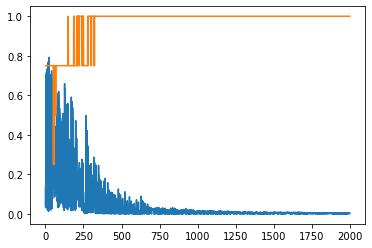

In [468]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps, loss)
plt.plot(steps, accuracies)

In [469]:
mlp.forward_step([1,1])
print(mlp.output)

0.934279010848196
